### EfficientNetV2 Medium - max exposure

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))

Accuracy score pr fold
0.6893203883495146, 0.625242718446602, 0.6679611650485436, 0.7048543689320388, 0.6893203883495146, 
0.7087378640776699, 0.6932038834951456, 0.7067961165048544, 0.6970873786407767, 0.7262135922330097, 
MSE pr fold
0.30484069945668224, 0.4133824266231807, 0.31930824312116274, 0.32717935896508477, 0.30969602468386354, 
0.28448606067270993, 0.30904694431735247, 0.3150160931097954, 0.30198777594516435, 0.2869042119366531, 
aggregate accuracy, mse
0.7106796116504854 0.28988731306984655


### Boxplot of prediction pr age class

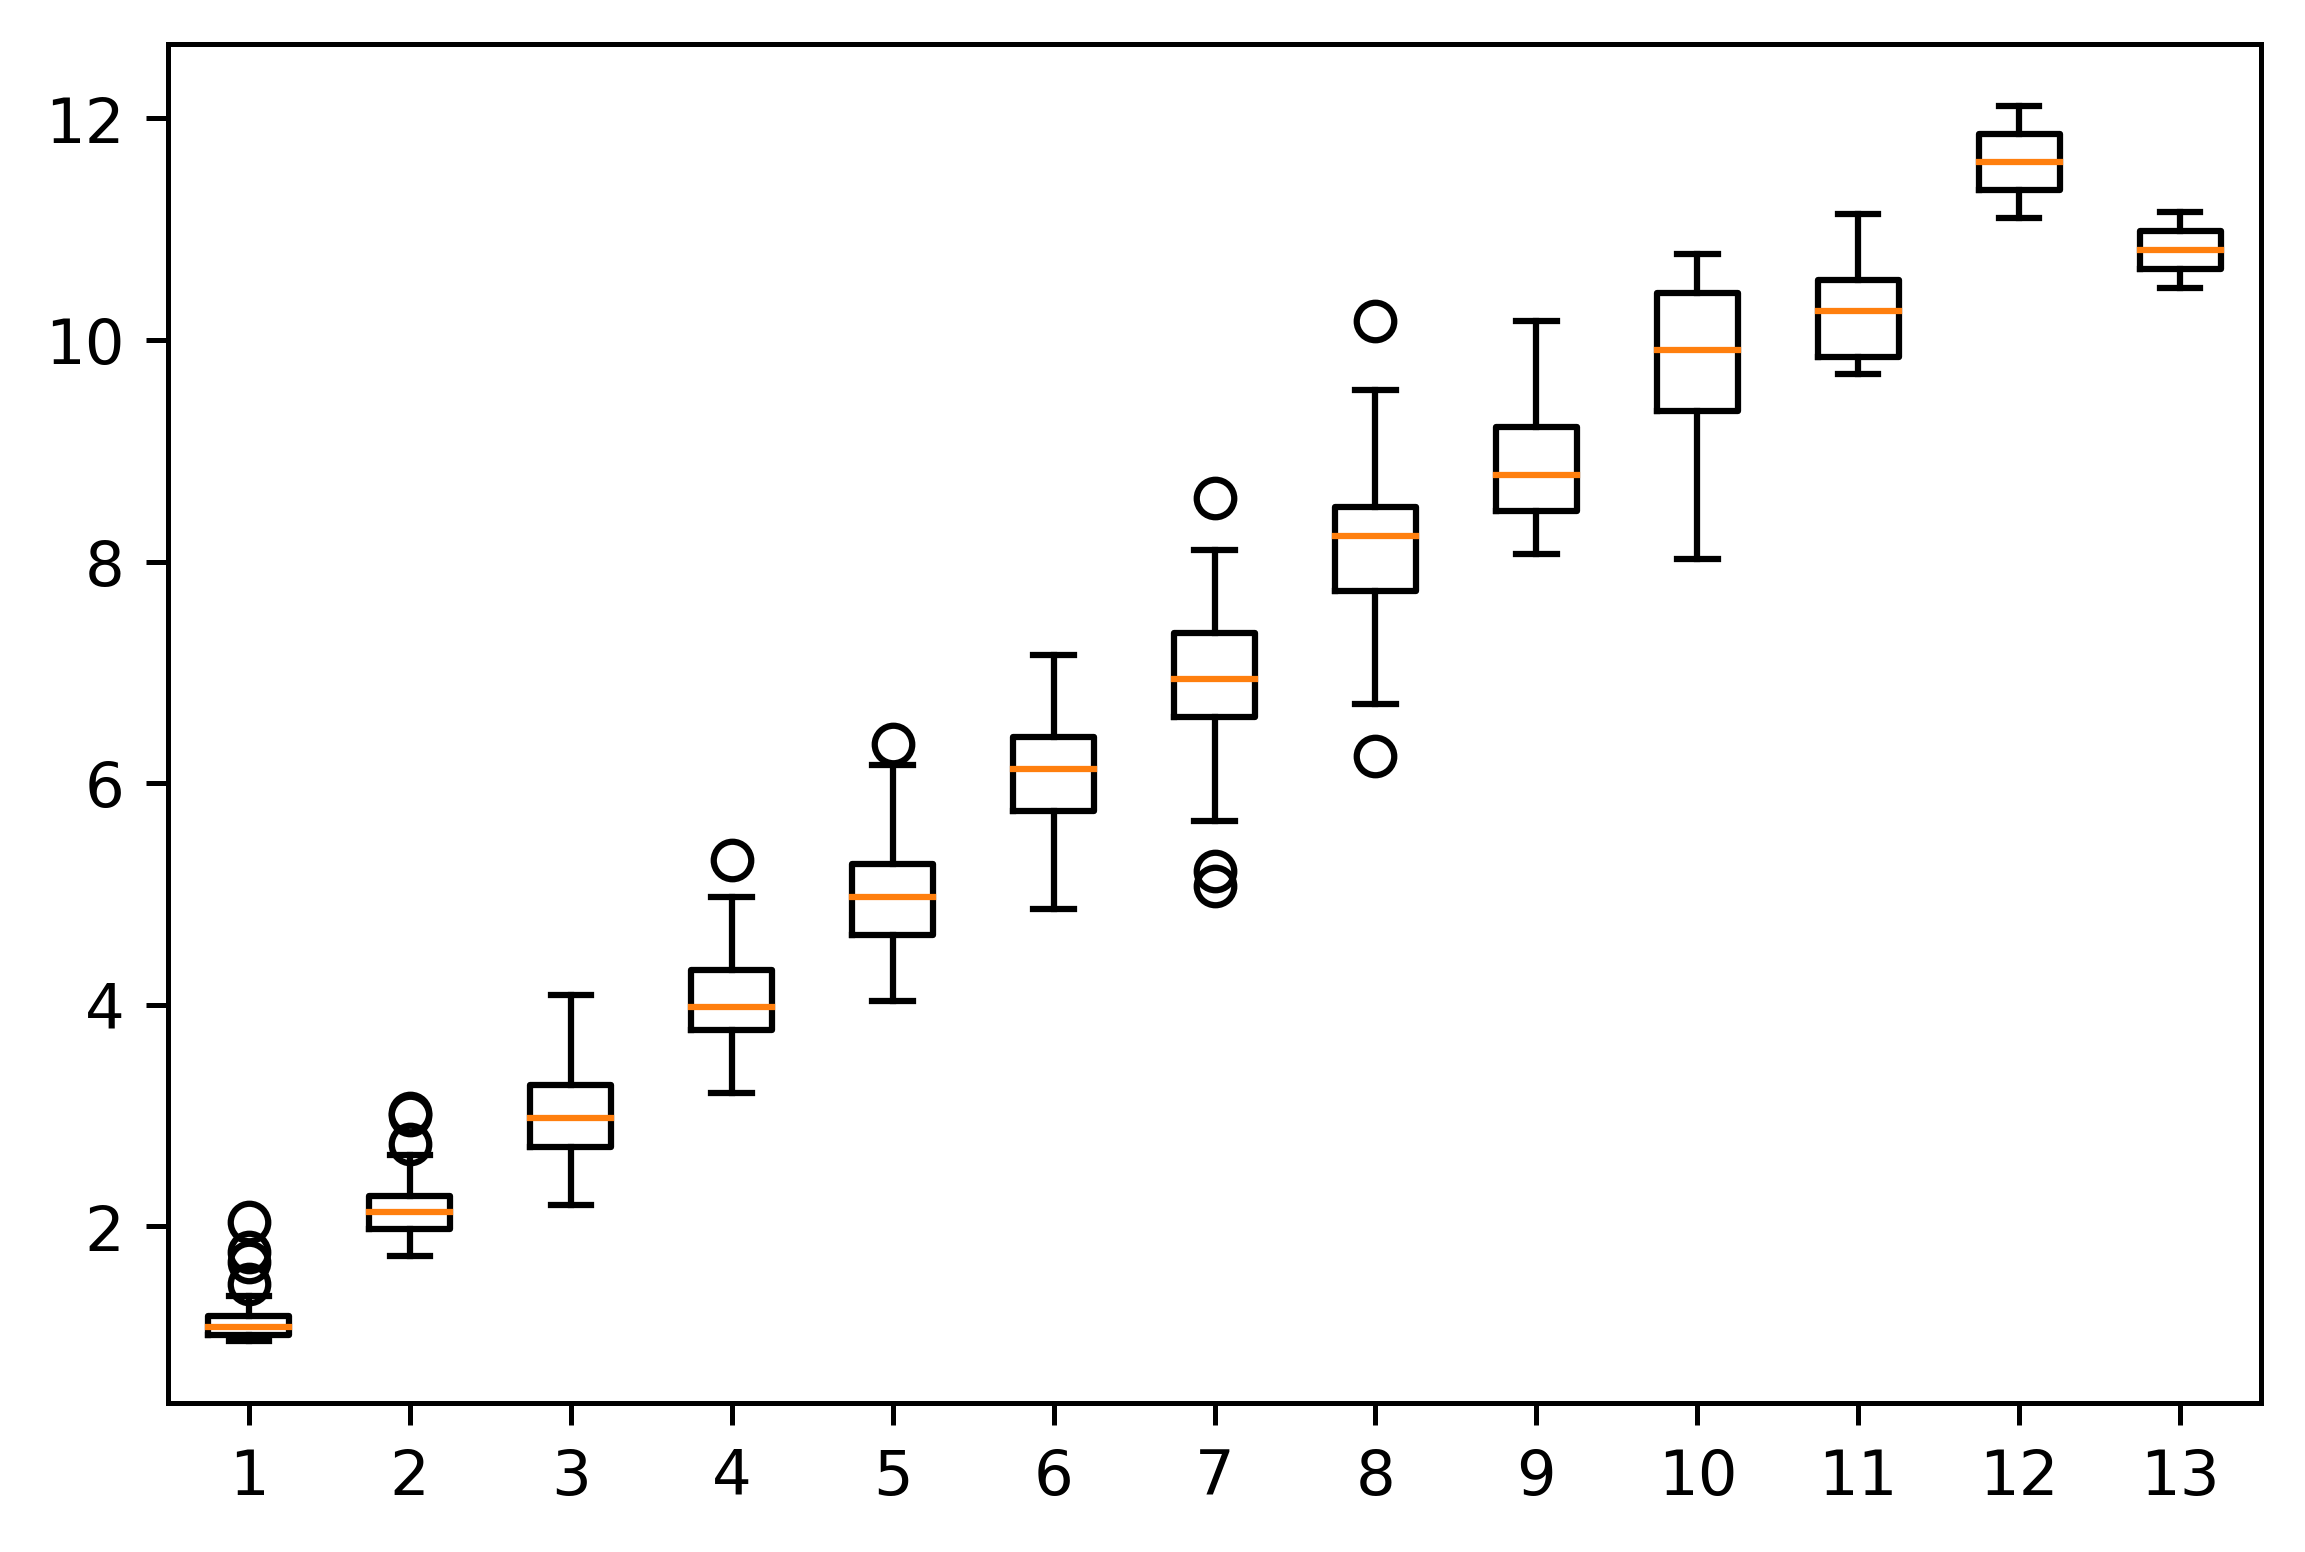

In [4]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()

### Residual plot per age group
The predictions show heteroskedasticity: heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

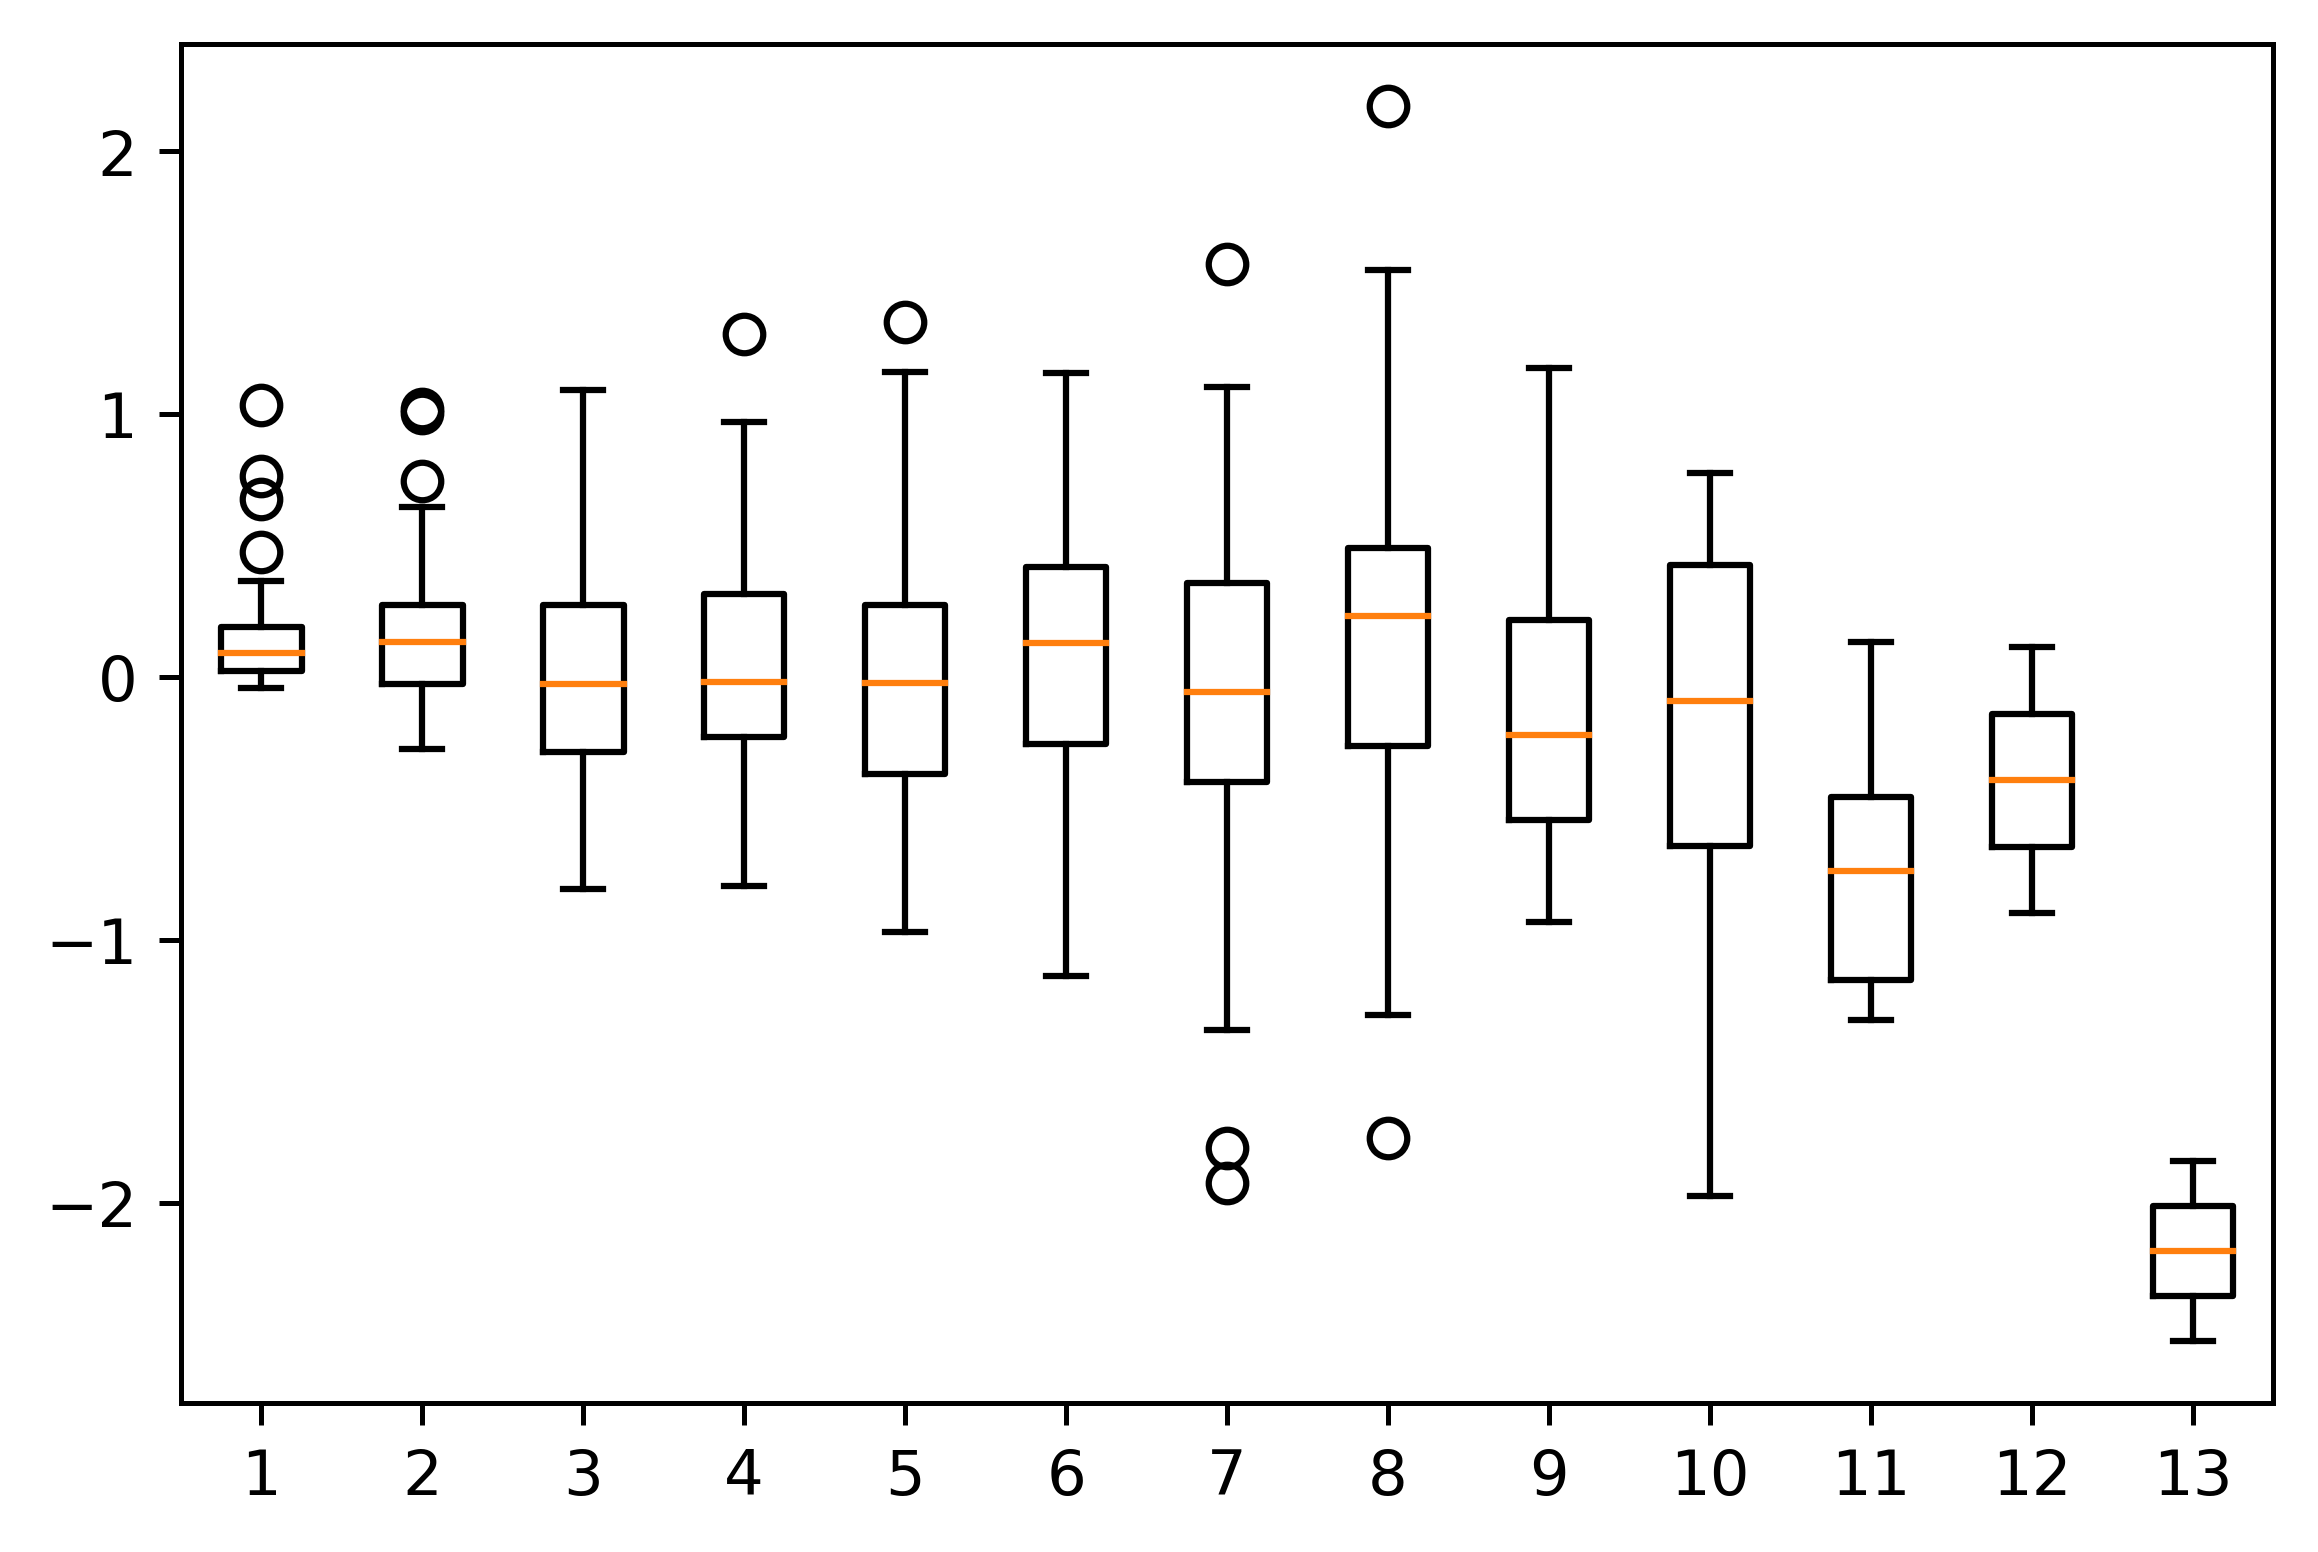

In [7]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

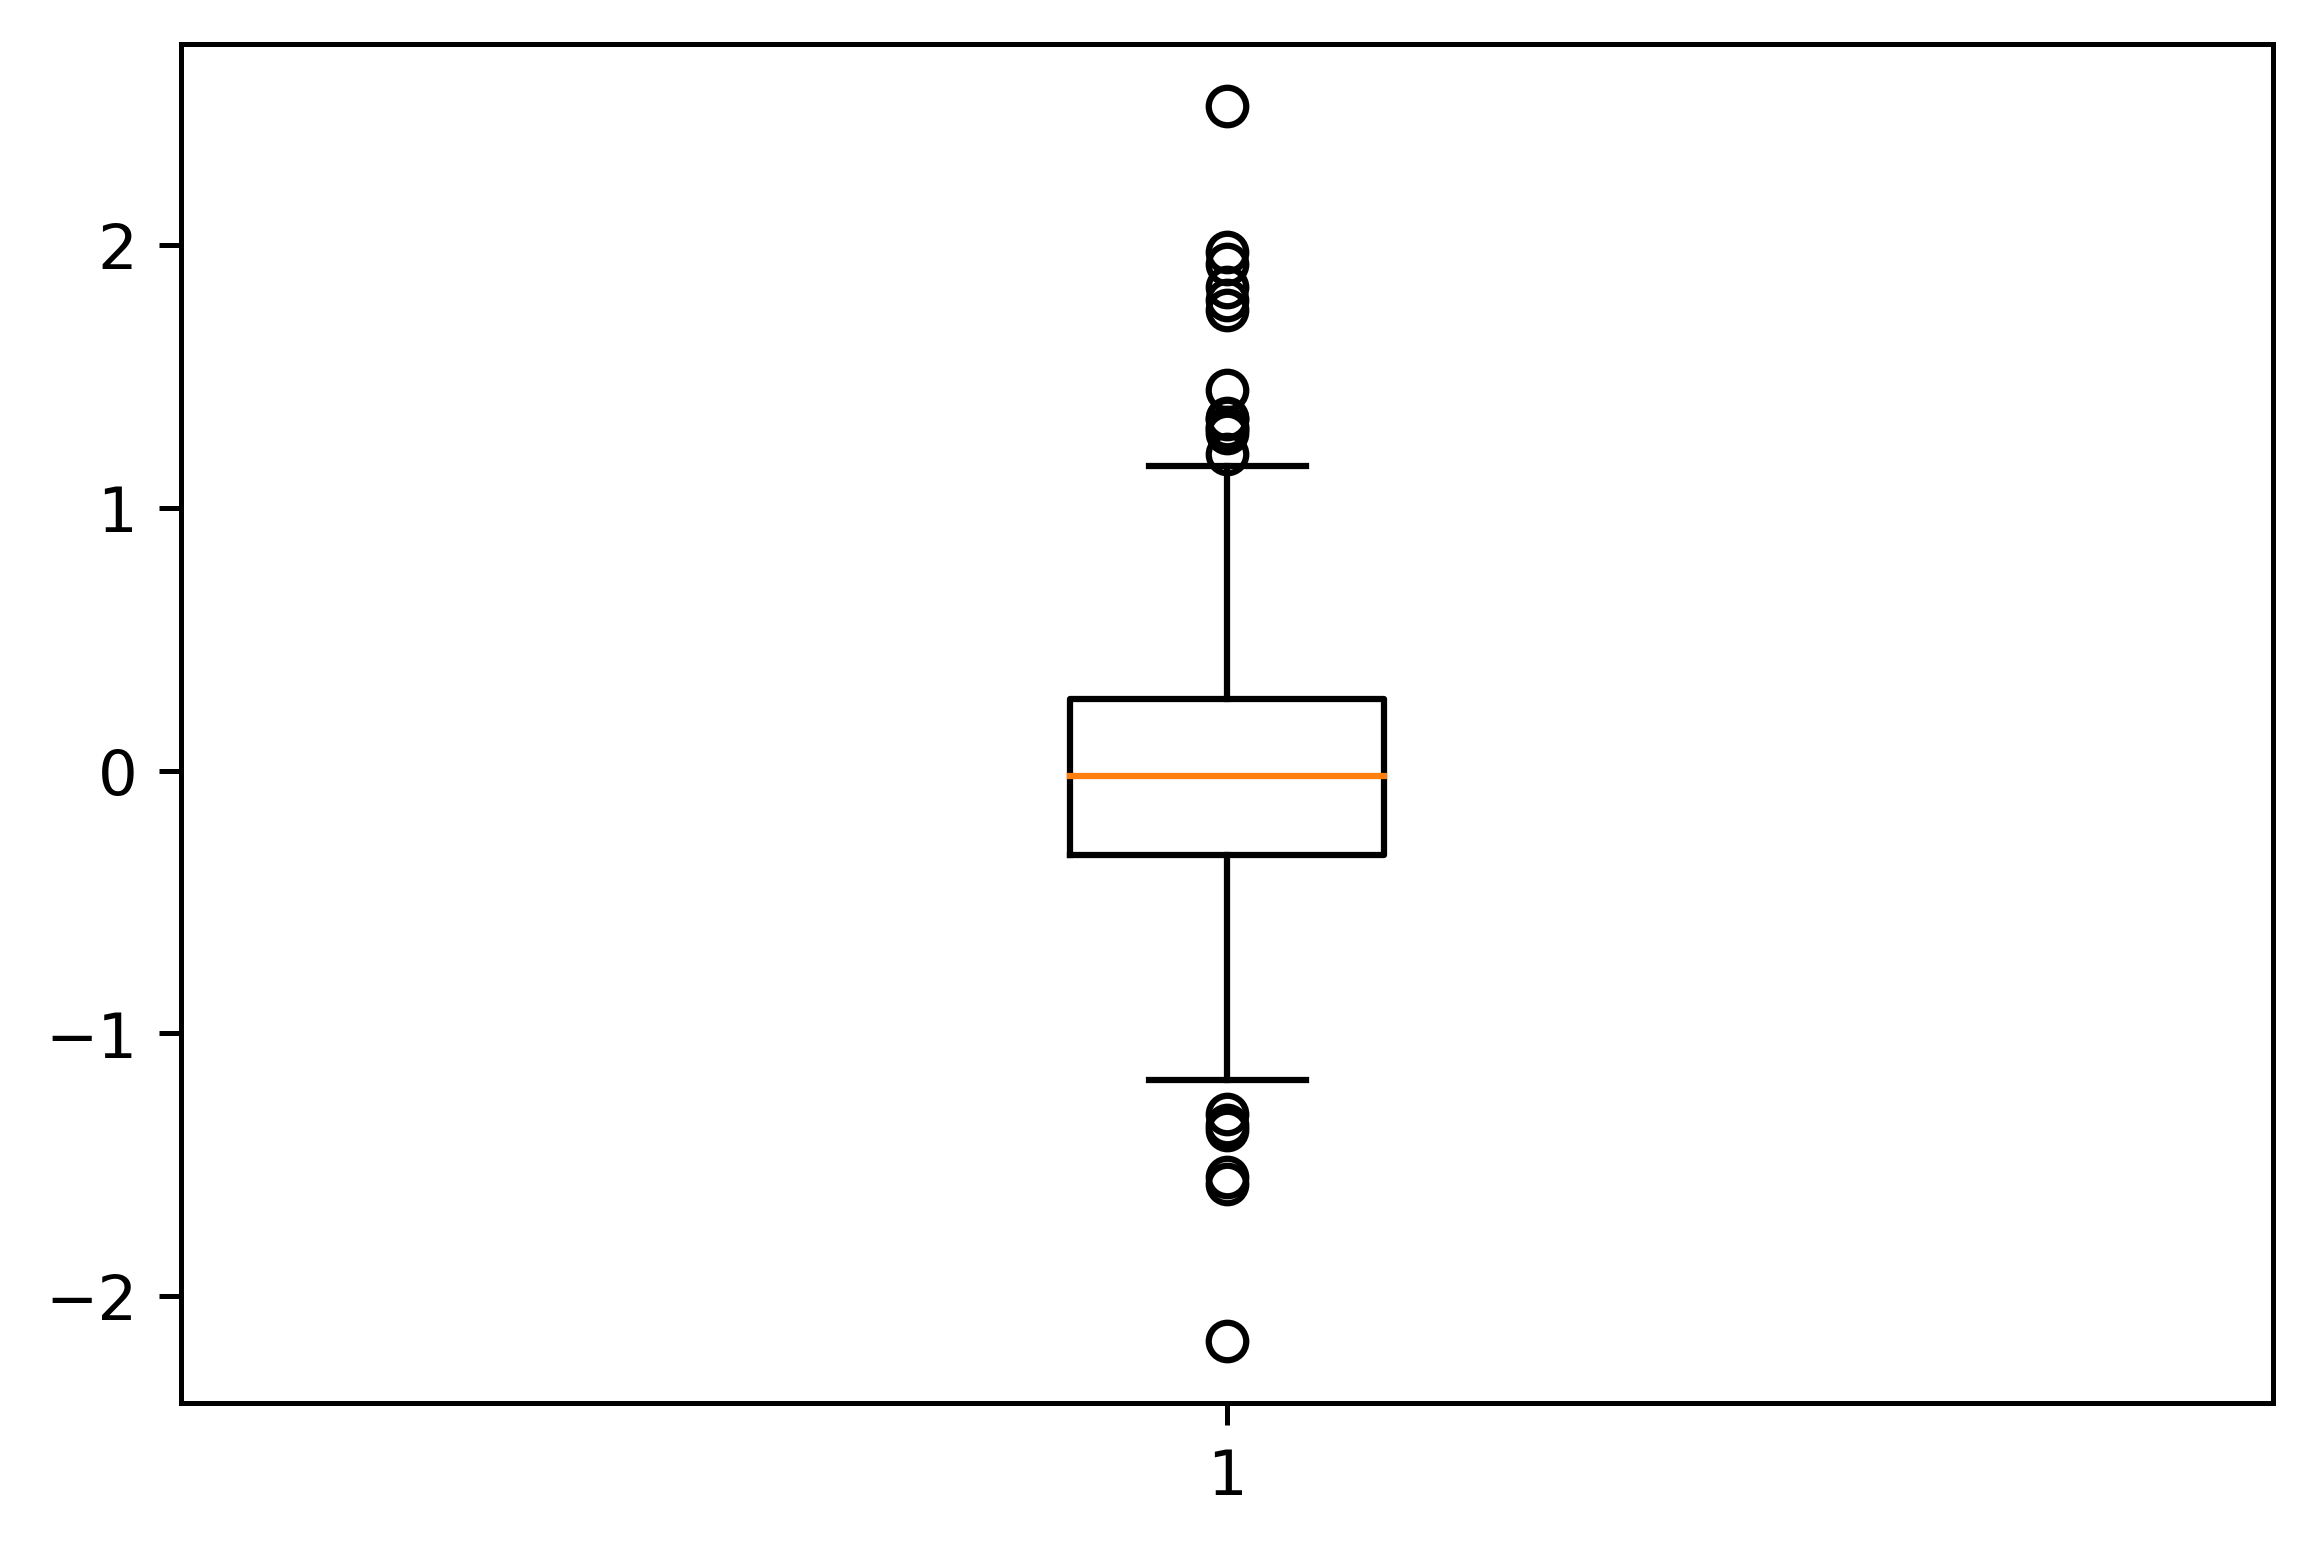

,0
count,515.000000
mean,-0.006974
std,0.538890
min,-2.172822
25%,-0.320571
50%,-0.022378
75%,0.273553
max,2.528783


In [6]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

errors in [0.5, 1.5):  140
errors in [1.5, \inf): 9
Total missclassification errors:149


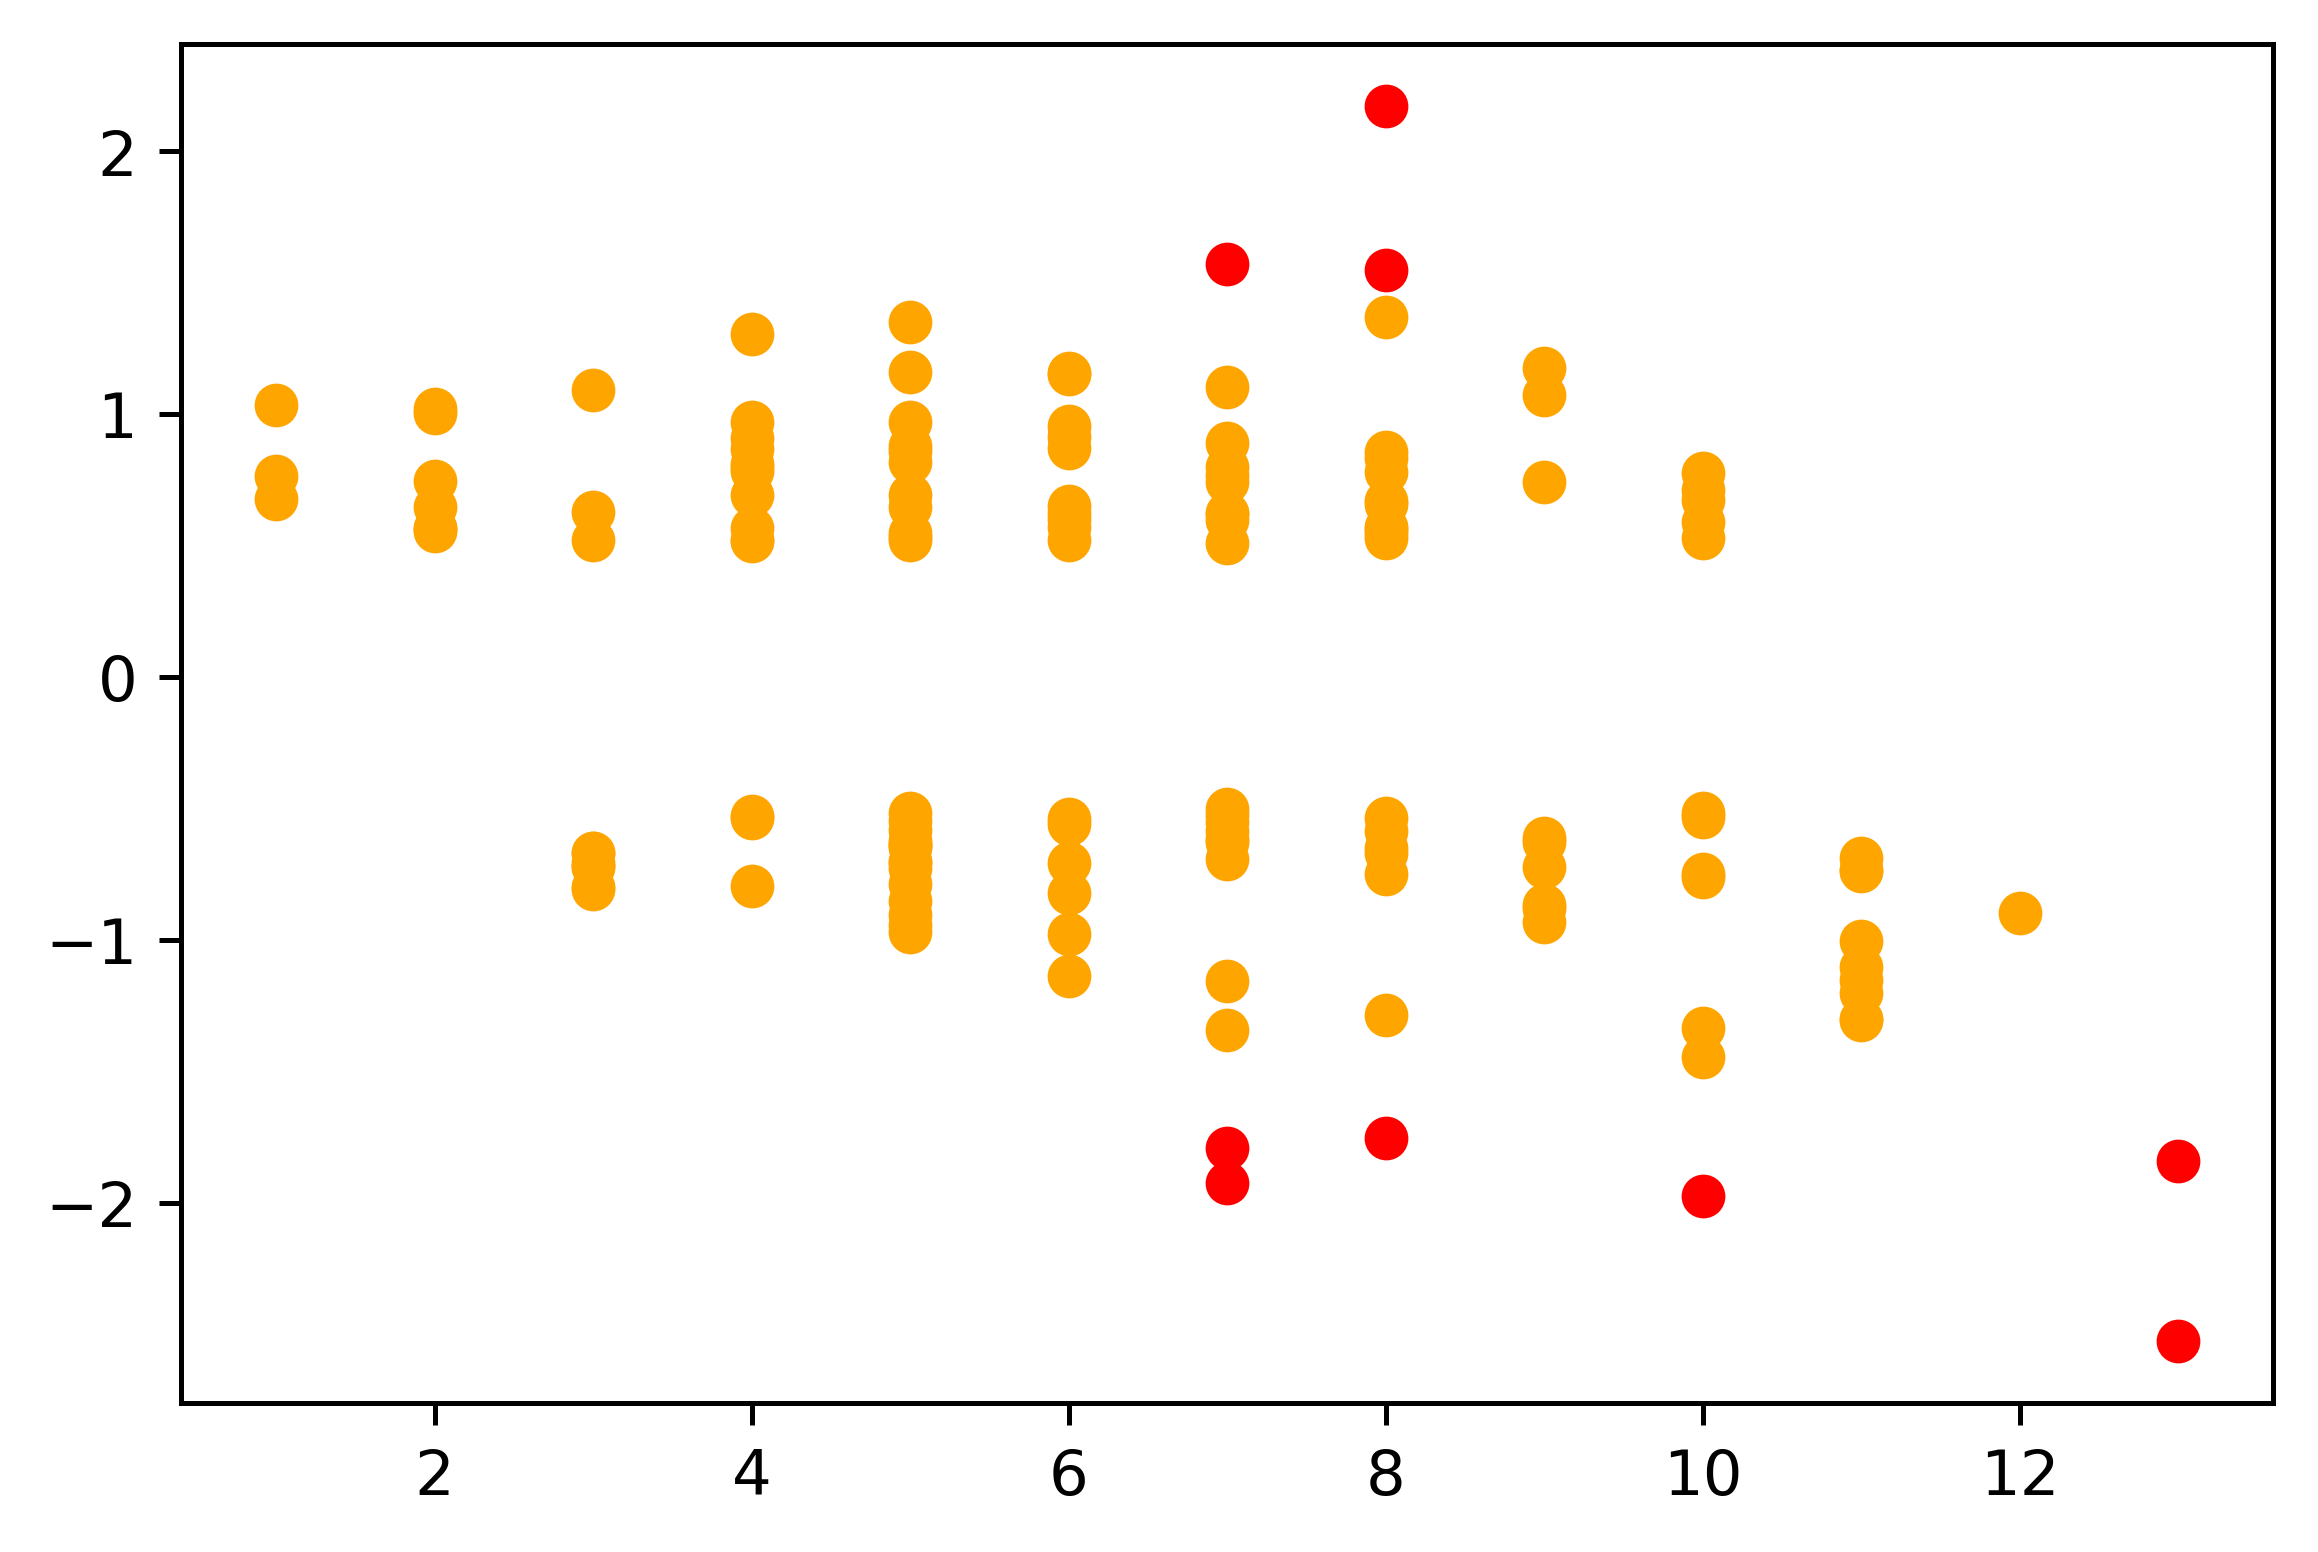

In [9]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()

### Excluding min/max prediction by fold pr prediction

In [12]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7106796116504854 0.28988731306984655

aggregate accuracy, mse
0.7184466019417476 0.29033815156280357


### Outliers >= 1.5 years

In [11]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

5.207655525207519 7,71
8.572964477539063 7,154
5.072947883605957 7,362
9.548140239715575 8,13
10.172821712493896 8,279
6.245895147323608 8,423
8.025323104858398 10,369
11.158608341217041 13,92
10.471217250823974 13,342
